<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Seaborn/introduction_to_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
import os

# Create a data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Download files using raw GitHub URLs and save them to the data folder
!wget -P data/ https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/young-people-survey-responses.csv
!wget -P data/ https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/mpg.csv
!wget -P data/ https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/student-alcohol-consumption.csv

# Fetch the zipped archive from UCI - student_data
!wget -P data/ "https://archive.ics.uci.edu/static/public/320/student%2Bperformance.zip"

# Unzip the first archive into the data folder
!unzip -o data/student+performance.zip -d data/

# Unzip the student.zip archive into the data folder
!unzip -o data/student.zip -d data/

# (Optional) Remove the zip files to save space
!rm data/student+performance.zip
!rm data/student.zip

### Seaborn built-in dataset `tips`

- total_bill: The total bill amount in dollars.
- tip: The tip amount in dollars.
- sex: The gender of the person who paid the bill (Male or Female).
- smoker: Whether the party included smokers (Yes or No).
- day: The day of the week (Sun, Sat, Thur, Fri).
- time: The time of the day (Dinner or Lunch).
- size: The number of people in the party.

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


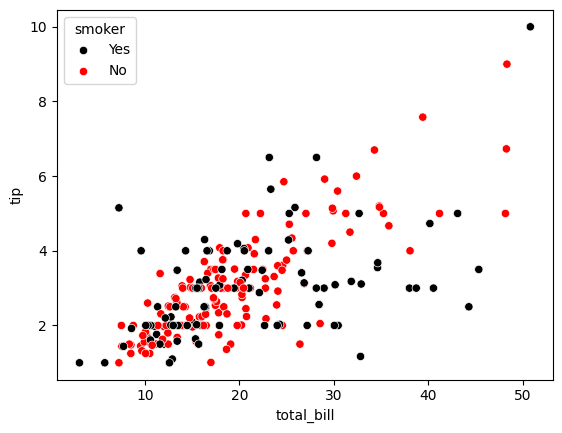

In [13]:
# Define a dictionary to map hue values ("smoker") to specific colors
hue_colors = {"Yes": "black",
"No": "red"}

# Create a scatter plot using seaborn
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,       # Use the 'tips' DataFrame as the data source
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show ()

### Using HTML hex color codes with hue


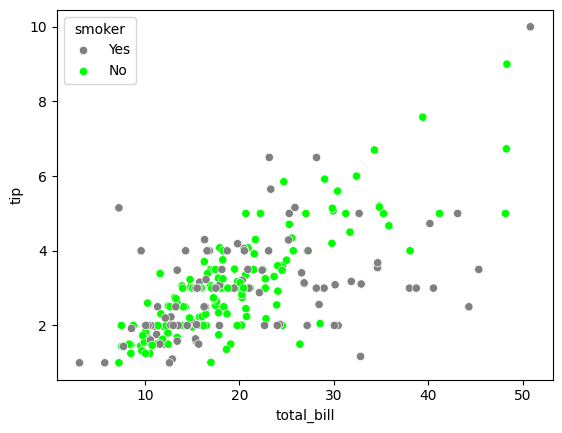

In [16]:
# Define a dictionary to map hue values ("smoker") to specific HTML hex color codes
hue_colors = {"Yes": "#808080", # Grey color for "Yes"
"No": "#00FF00"} # Green color for "No"

# Create a scatter plot using seaborn
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show()

In [26]:
# Load each subject file (semicolon-separated) into DataFrames
mat = pd.read_csv('data/student-mat.csv', sep=';')
por = pd.read_csv('data/student-por.csv', sep=';')

# Concatenate along rows to get 1 044 records
df = pd.concat([mat, por], ignore_index=True)

# Drop job-related and guardian columns to match DataCamp’s 29 columns
df.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'], inplace=True)

# Rename and recode 'address' → 'location'
df.rename(columns={'address': 'location'}, inplace=True)
df['location'] = df['location'].map({'U': 'Urban', 'R': 'Rural'})

# Rename and recode 'studytime' → 'study_time' with textual bands
study_map = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}
df.rename(columns={'studytime': 'study_time'}, inplace=True)
df['study_time'] = df['study_time'].map(study_map)

# Reorder columns to match DataCamp’s .head() layout
desired_order = [
    'school','sex','age','famsize','Pstatus','Medu','Fedu','traveltime',
    'failures','schoolsup','famsup','paid','activities','nursery','higher',
    'internet','romantic','famrel','freetime','goout','Dalc','Walc','health',
    'absences','G1','G2','G3','location','study_time'
]
student_data = df[desired_order]

In [27]:
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


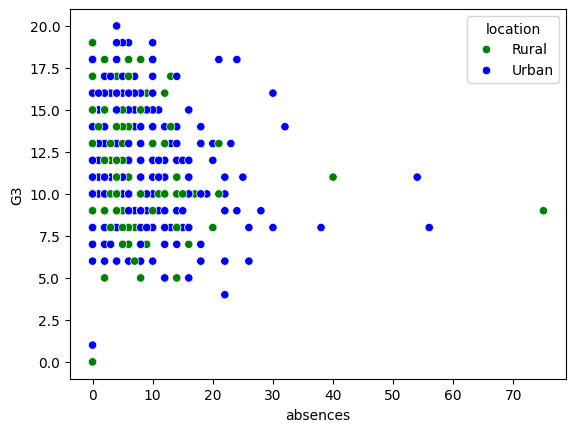

In [30]:
# Create a scatter plot of absences vs. final grade

# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

sns.scatterplot(x="absences",
                y="G3",
                data=student_data,
                hue="location",
                hue_order=["Rural", "Urban"],
                palette=palette_colors)

plt.show()

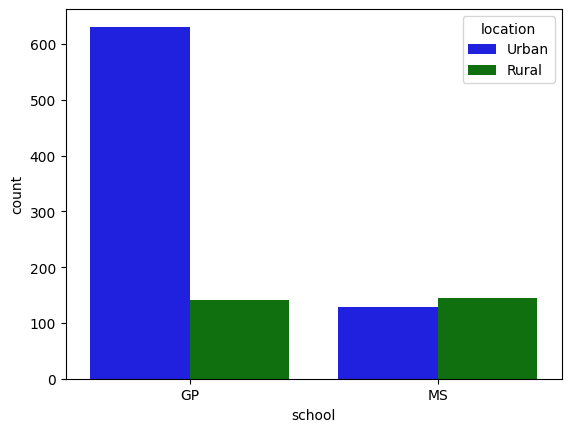

In [31]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)

# Display plot
plt.show()

## Visualizing Two Quantitative Variables

In this chapter, you will create and customize plots that visualize the relationship between two quantitative variables. To do this, you will use scatter plots and line plots to explore how the level of air pollution in a city changes over the course of a day and how horsepower relates to fuel efficiency in cars. You will also see another big advantage of using Seaborn - the ability to easily create subplots in a single figure!